In [2]:
import random
import math
import matplotlib.pyplot as plt

In [3]:
num_customers = 20
num_vehicles = 5
depot = (0, 0)
customer_positions = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(num_customers)]
print(customer_positions)

[(92.73977217740543, 91.1197609472095), (50.02091670489808, 20.467096253437933), (90.48723605678403, 61.47506530643078), (89.92911328187559, 32.890647378089625), (84.99630877277971, 37.012393151257406), (39.51915924437629, 76.94001071125808), (70.07331610094315, 93.08613634465017), (51.21500776982732, 87.7852391539924), (37.34040541907409, 96.66018375865907), (74.68205937489549, 73.40635182004323), (41.129419104341316, 92.63394969976298), (3.1257922333654875, 77.36561667958078), (63.64524346988624, 71.22796135896087), (20.105221205235736, 9.858380547338463), (90.88910698598457, 92.26095574793997), (49.64463787769821, 50.75613597524604), (84.20295425318749, 92.65904977791946), (31.843876971931873, 6.272077078058825), (4.020966582301777, 64.63354792339875), (67.95435332980152, 47.003259180799375)]


In [4]:
population_size = 50
num_generations = 100
mutation_rate = 0.1

In [5]:

# Define the fitness function
def fitness(route):
    total_distance = 0
    for i in range(len(route) - 1):
        from_index = route[i]
        to_index = route[i + 1]
        dist = distance(customer_positions[from_index], customer_positions[to_index])
        total_distance += dist
    return total_distance


In [6]:

def create_individual(max_capacity):
    individual = [0] # start at the depot
    vehicle_routes = [[] for _ in range(num_vehicles)]
    vehicle_capacities = [0 for _ in range(num_vehicles)]
    for customer_index in range(1, num_customers):
        vehicle_index = random.randint(0, num_vehicles - 1)
        if vehicle_capacities[vehicle_index] + 1 <= max_capacity:
            vehicle_routes[vehicle_index].append(customer_index)
            vehicle_capacities[vehicle_index] += 1
        else:
            individual += [0] + vehicle_routes[vehicle_index] + [0] # end the route at the depot
            vehicle_routes[vehicle_index] = [customer_index]
            vehicle_capacities[vehicle_index] = 1
    individual += [0] + [c for route in vehicle_routes for c in route] + [0] # end the route at the depot
    return individual


In [7]:

def distance(node1, node2):
    x1, y1 = node1
    x2, y2 = node2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


In [8]:

population = [create_individual(3) for _ in range(population_size)]
print(population)



[[0, 0, 1, 3, 7, 0, 0, 8, 9, 12, 0, 0, 4, 6, 11, 0, 0, 18, 14, 15, 2, 5, 17, 10, 13, 16, 19, 0], [0, 0, 5, 6, 7, 0, 0, 8, 9, 12, 0, 0, 2, 3, 11, 0, 0, 10, 16, 18, 0, 0, 13, 19, 4, 1, 14, 15, 17, 0], [0, 0, 1, 2, 5, 0, 0, 6, 10, 13, 0, 0, 3, 4, 15, 0, 0, 9, 17, 16, 14, 8, 11, 18, 7, 12, 19, 0], [0, 0, 3, 7, 8, 0, 0, 6, 13, 15, 0, 0, 16, 17, 18, 0, 0, 19, 2, 4, 14, 1, 5, 9, 12, 10, 11, 0], [0, 0, 1, 3, 5, 0, 0, 2, 7, 8, 0, 0, 10, 11, 12, 0, 0, 16, 6, 14, 9, 19, 4, 13, 18, 15, 17, 0], [0, 0, 2, 3, 4, 0, 0, 7, 11, 13, 0, 0, 5, 9, 12, 0, 0, 1, 8, 14, 17, 18, 6, 16, 19, 10, 15, 0], [0, 0, 3, 4, 8, 0, 0, 1, 6, 9, 0, 0, 2, 5, 15, 0, 0, 11, 14, 18, 16, 19, 7, 13, 17, 10, 12, 0], [0, 0, 6, 10, 13, 0, 0, 3, 4, 8, 0, 0, 2, 7, 11, 0, 0, 14, 16, 18, 19, 5, 9, 1, 12, 15, 17, 0], [0, 0, 5, 9, 10, 0, 0, 6, 8, 11, 0, 0, 3, 7, 14, 0, 0, 16, 19, 1, 2, 4, 17, 18, 12, 13, 15, 0], [0, 0, 1, 2, 6, 0, 0, 3, 4, 8, 0, 0, 7, 9, 10, 12, 14, 19, 13, 17, 16, 18, 5, 11, 15, 0], [0, 0, 4, 5, 13, 0, 0, 6, 11, 12, 0, 0,

Generation 0: [0, 2, 3, 4, 14, 6, 7, 10, 5, 8, 9, 18, 11, 12, 15, 16, 1, 13, 17, 19], fitness=653.7664615192847


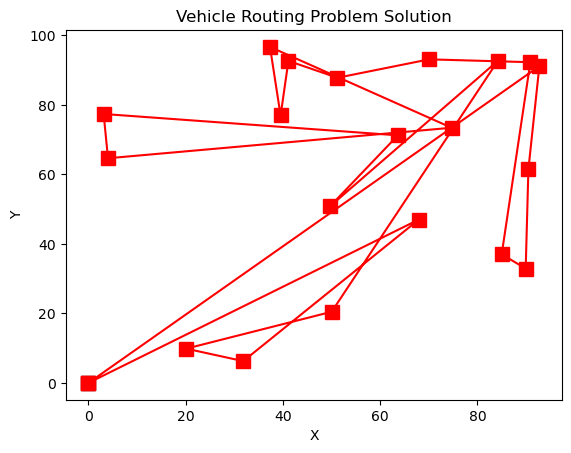

Generation 1: [0, 2, 3, 4, 14, 6, 7, 10, 5, 8, 9, 18, 11, 12, 15, 16, 1, 13, 17, 19], fitness=653.7664615192847


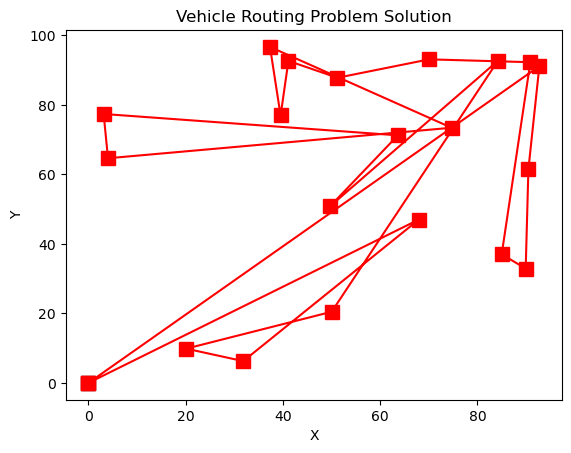

Generation 2: [0, 2, 3, 4, 14, 6, 7, 10, 5, 8, 9, 18, 11, 12, 15, 16, 1, 13, 17, 19], fitness=653.7664615192847


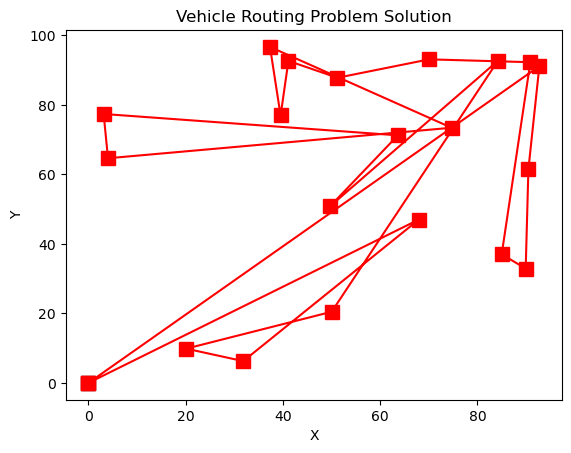

Generation 3: [0, 2, 3, 4, 14, 6, 7, 8, 5, 10, 9, 18, 11, 12, 15, 16, 1, 13, 17, 19], fitness=653.7273487265211


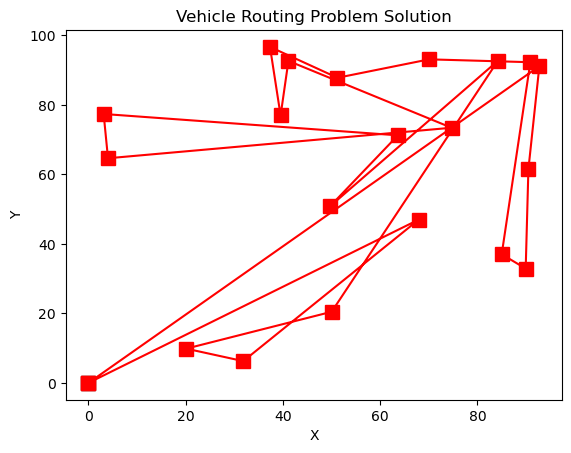

Generation 4: [0, 2, 3, 4, 14, 6, 7, 8, 5, 10, 9, 18, 11, 12, 15, 16, 1, 13, 17, 19], fitness=653.7273487265211


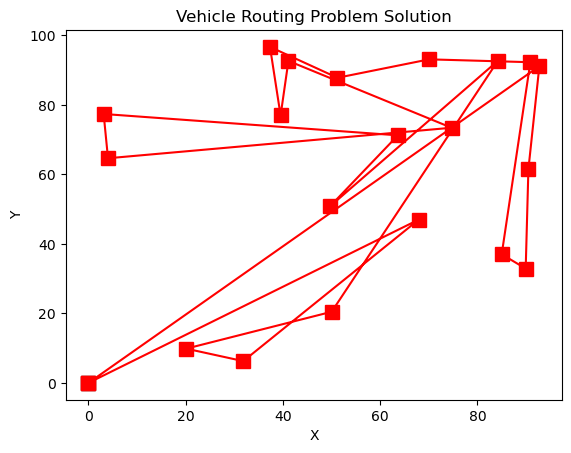

Generation 5: [0, 2, 3, 4, 14, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 16, 1, 13, 17, 19], fitness=634.8686747909131


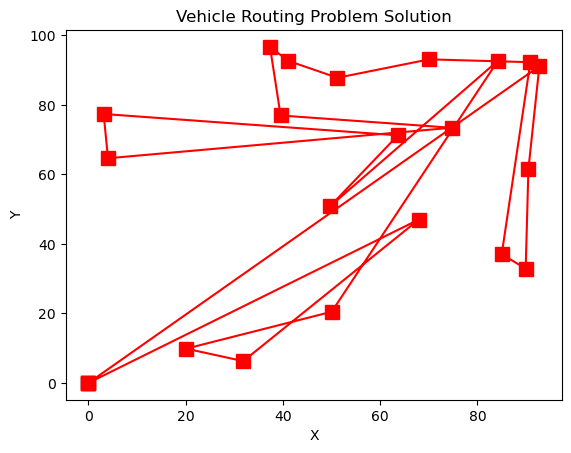

Generation 6: [0, 2, 3, 4, 14, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 16, 1, 13, 17, 19], fitness=634.8686747909131


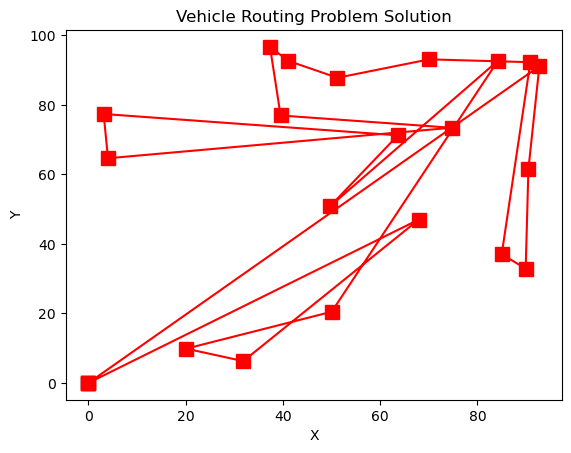

Generation 7: [0, 2, 3, 4, 14, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 16, 1, 13, 17, 19], fitness=634.8686747909131


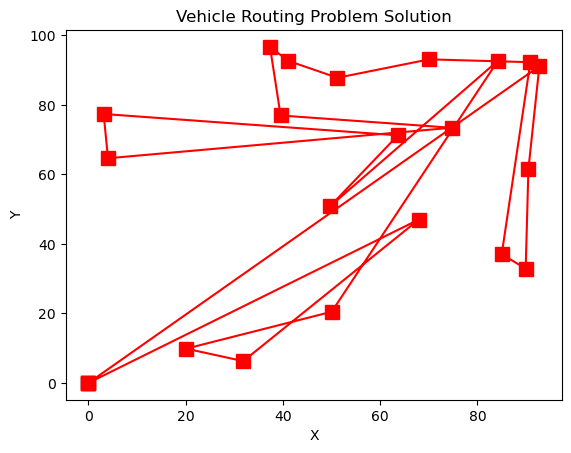

Generation 8: [0, 2, 3, 4, 14, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 16, 1, 13, 17, 19], fitness=634.8686747909131


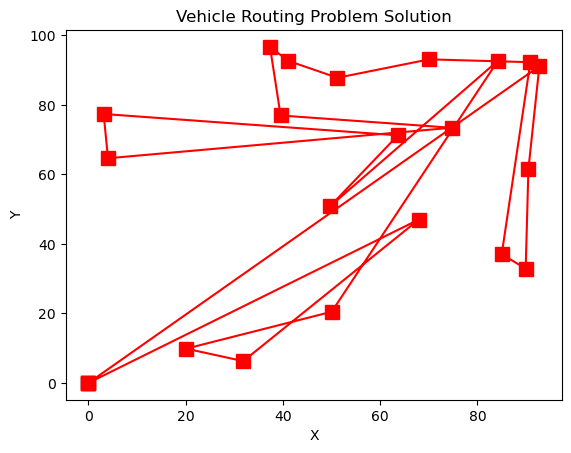

Generation 9: [0, 2, 3, 4, 14, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 16, 17, 13, 1, 19], fitness=633.6032948976678


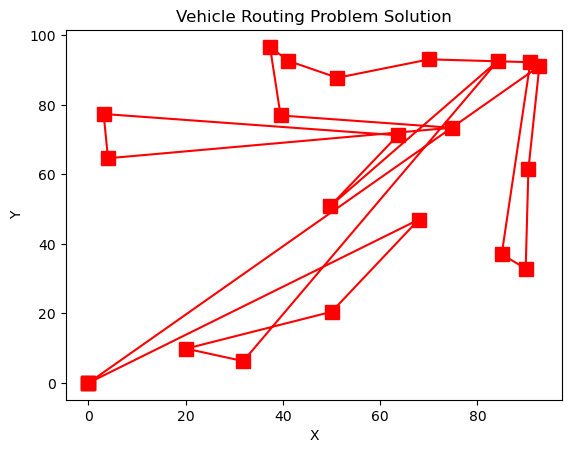

Generation 10: [0, 16, 3, 4, 14, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 2, 1, 13, 17, 19], fitness=610.9126764882827


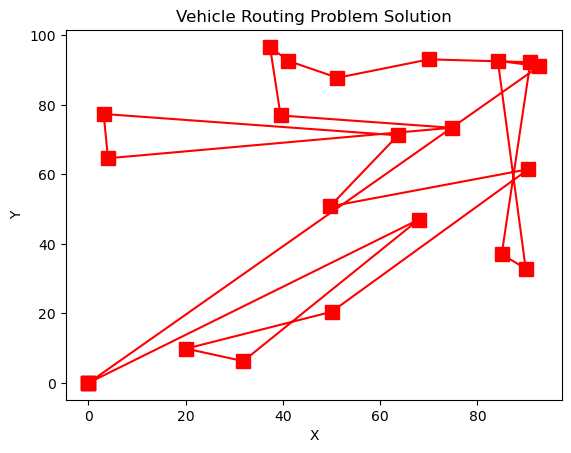

Generation 11: [0, 2, 3, 4, 14, 6, 16, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=558.8624471111482


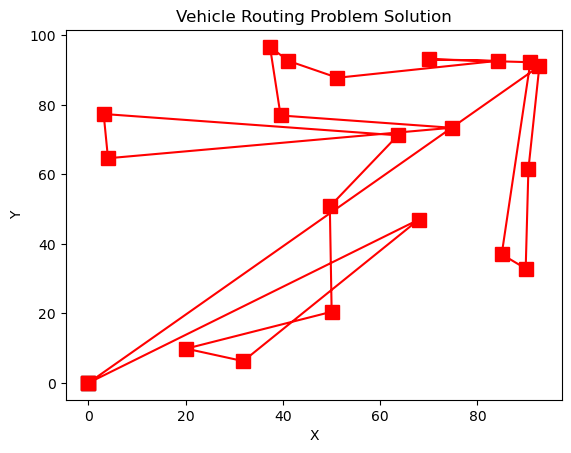

Generation 12: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


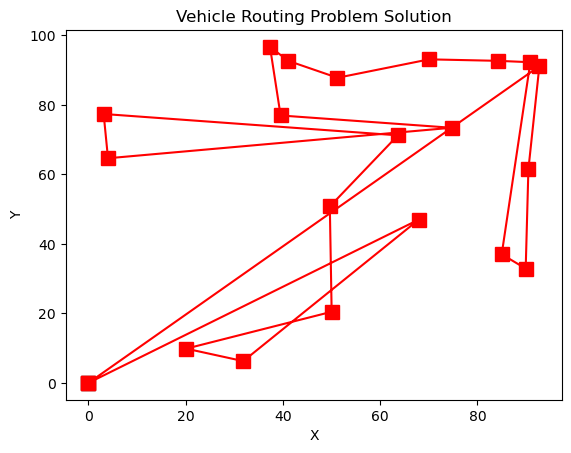

Generation 13: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


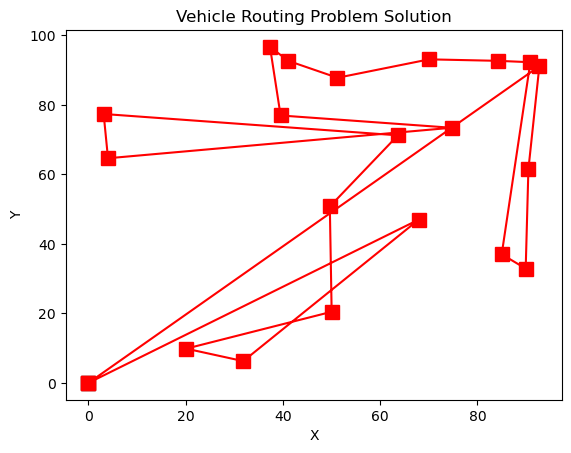

Generation 14: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


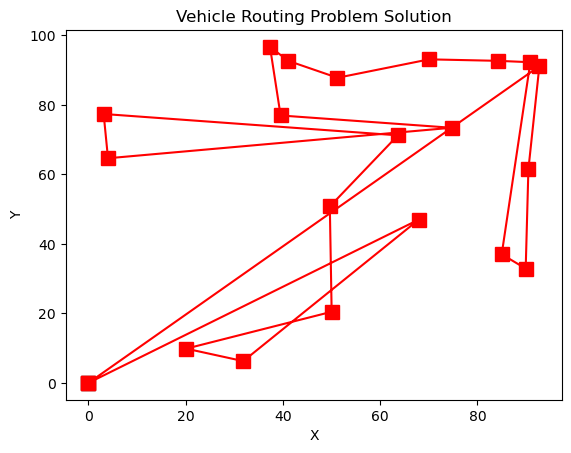

Generation 15: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


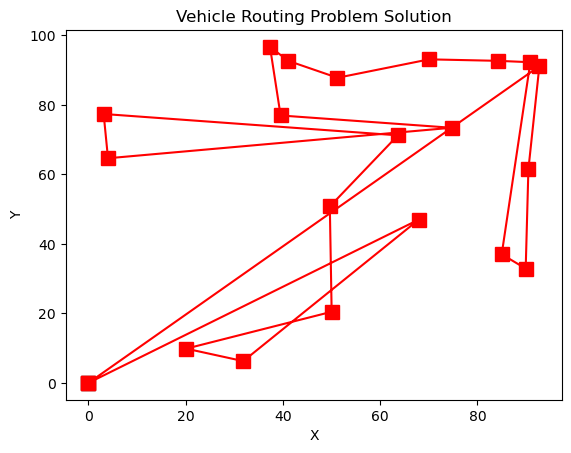

Generation 16: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


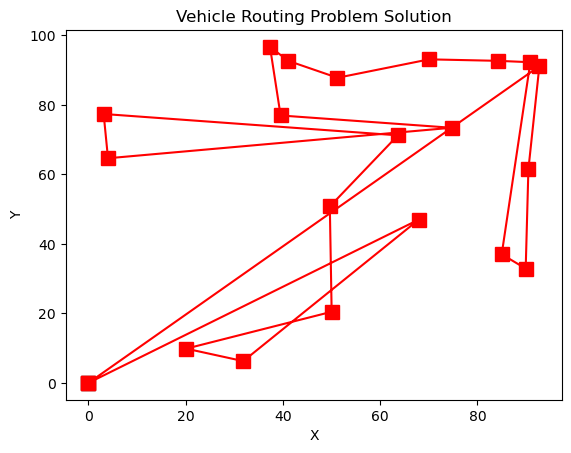

Generation 17: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


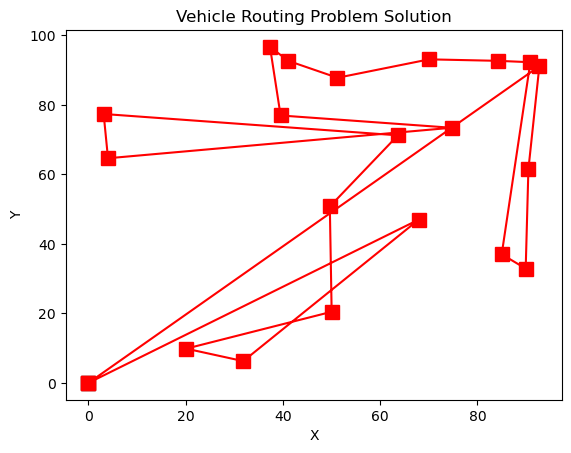

Generation 18: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


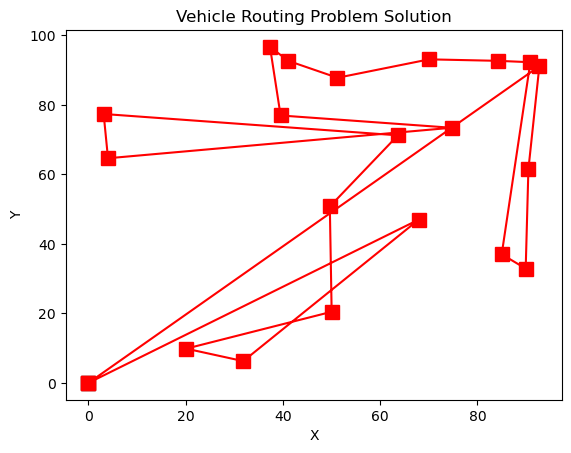

Generation 19: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


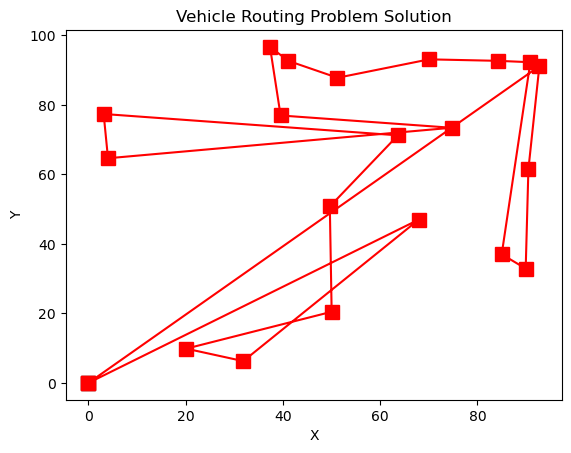

Generation 20: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


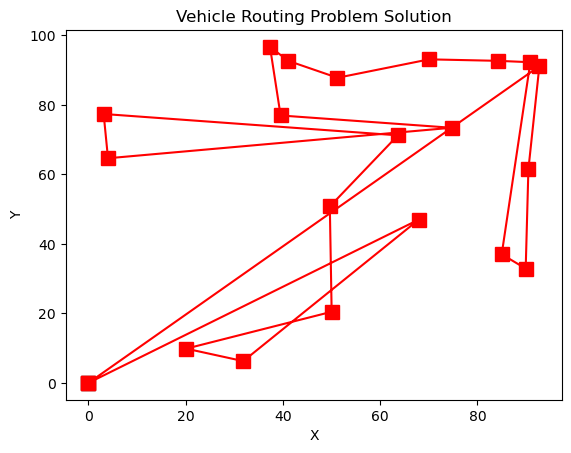

Generation 21: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


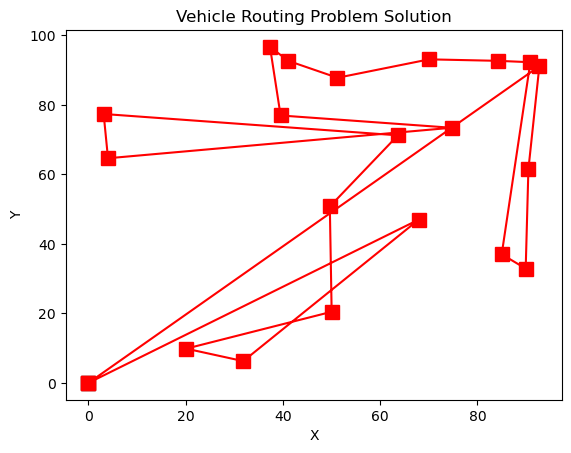

Generation 22: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 1, 13, 17, 19], fitness=530.9714192791174


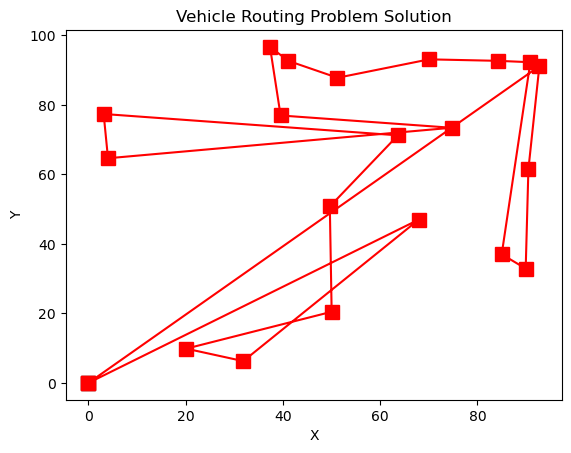

Generation 23: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 17, 13, 1, 19], fitness=526.1878246245002


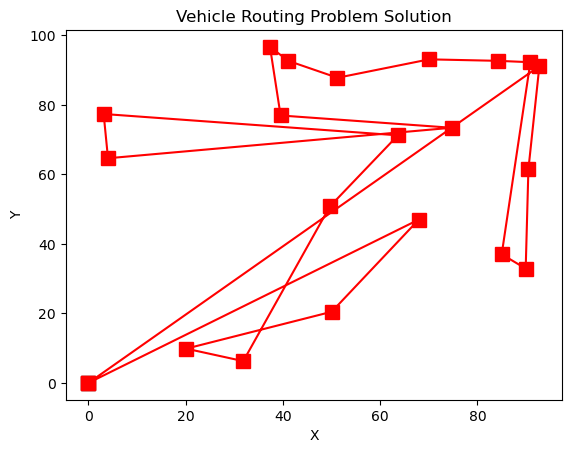

Generation 24: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 17, 13, 1, 19], fitness=526.1878246245002


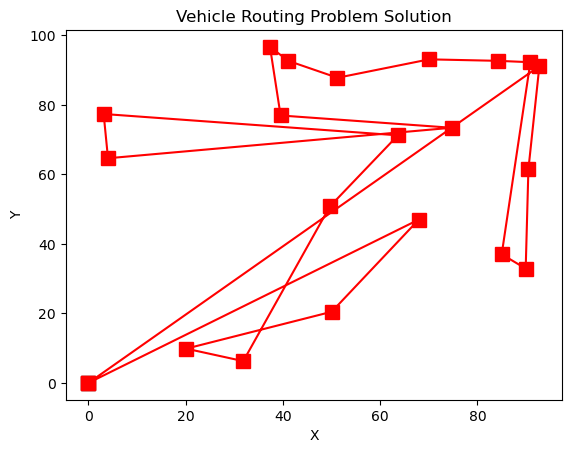

Generation 25: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 17, 13, 1, 19], fitness=526.1878246245002


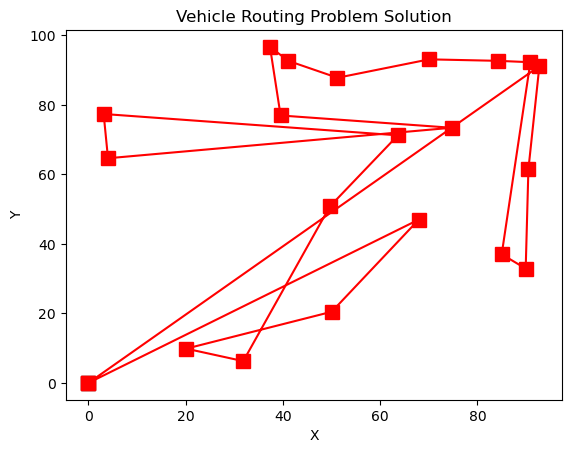

Generation 26: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 9, 18, 11, 12, 15, 17, 13, 1, 19], fitness=526.1878246245002


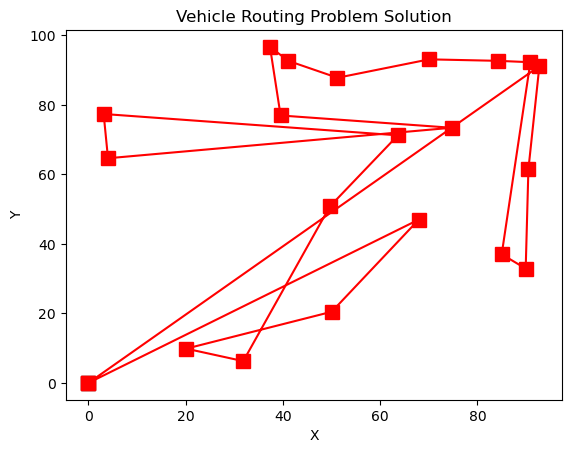

Generation 27: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 17, 13, 1, 19], fitness=477.6635281854694


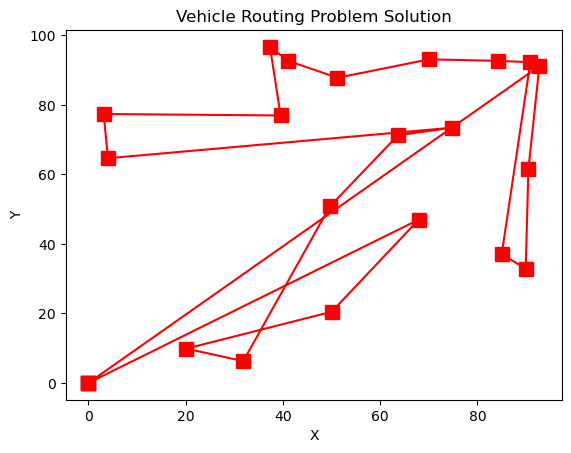

Generation 28: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 17, 13, 1, 19], fitness=477.6635281854694


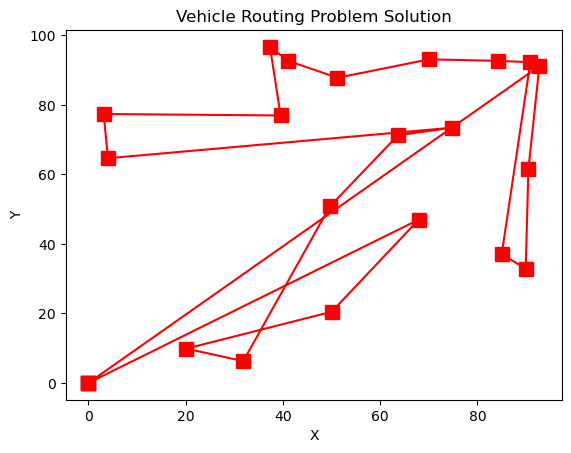

Generation 29: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 17, 13, 1, 19], fitness=477.6635281854694


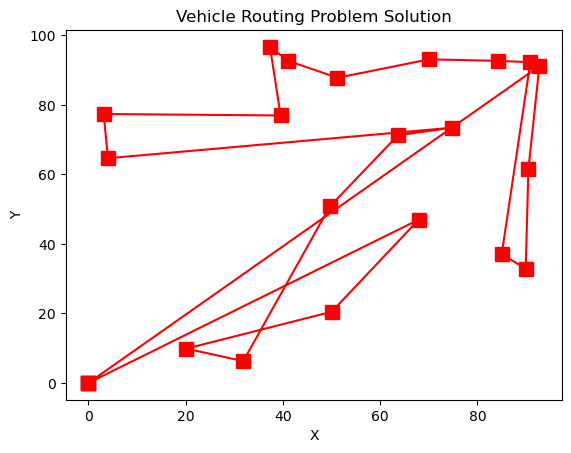

Generation 30: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


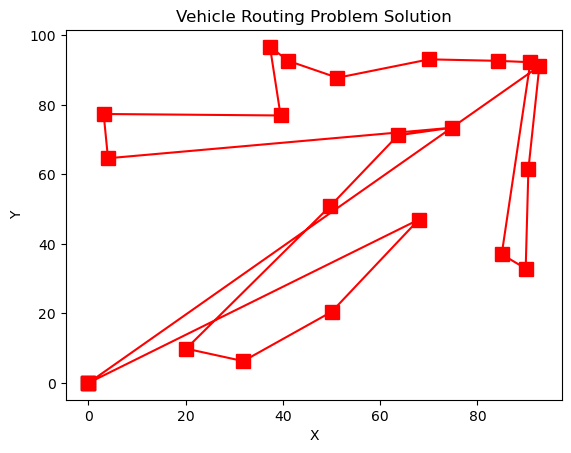

Generation 31: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


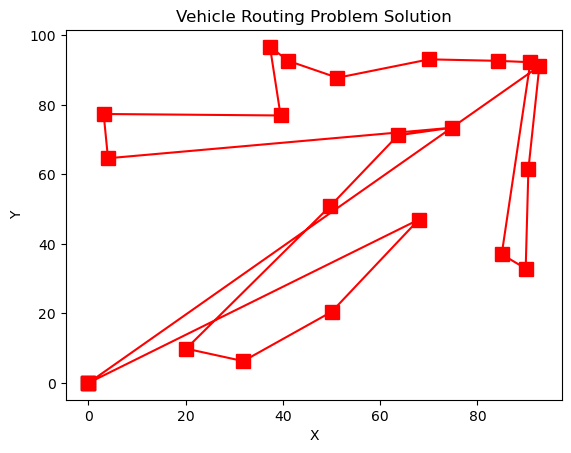

Generation 32: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


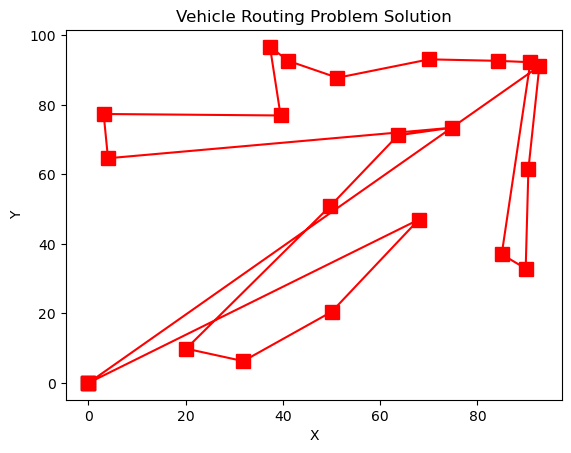

Generation 33: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


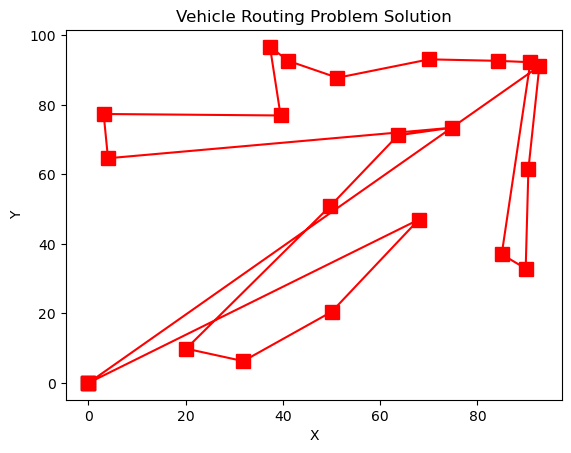

Generation 34: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


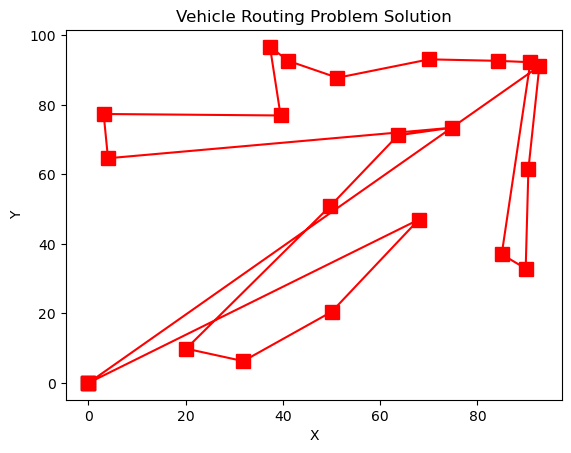

Generation 35: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


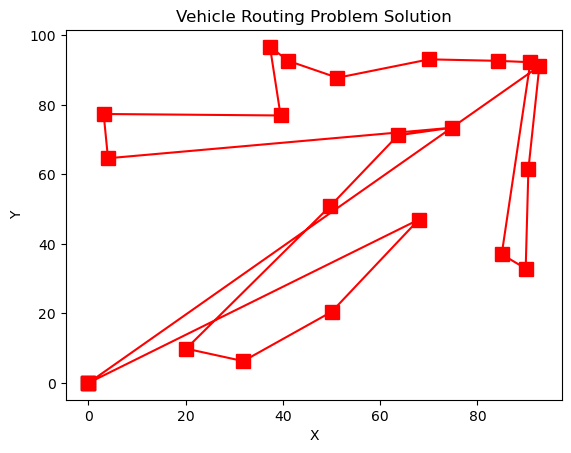

Generation 36: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


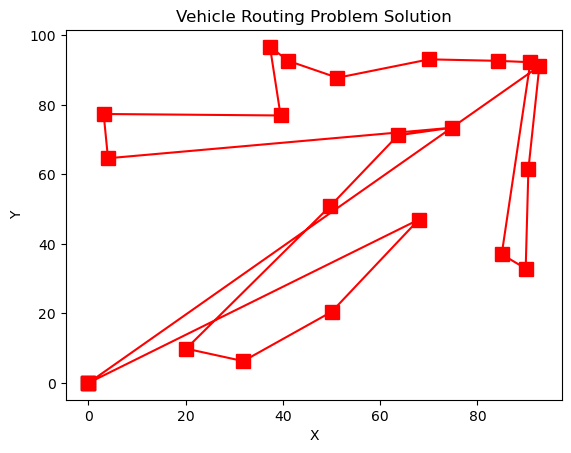

Generation 37: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


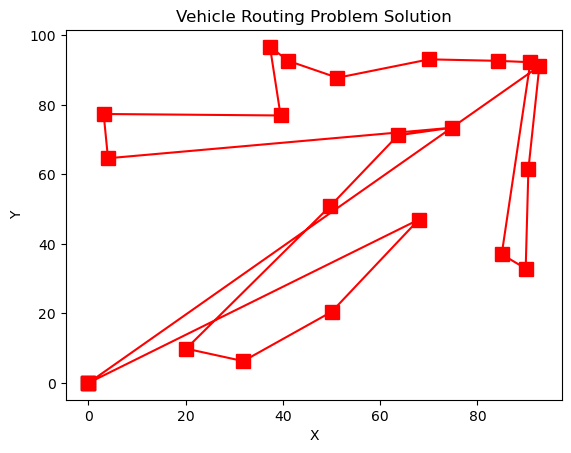

Generation 38: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


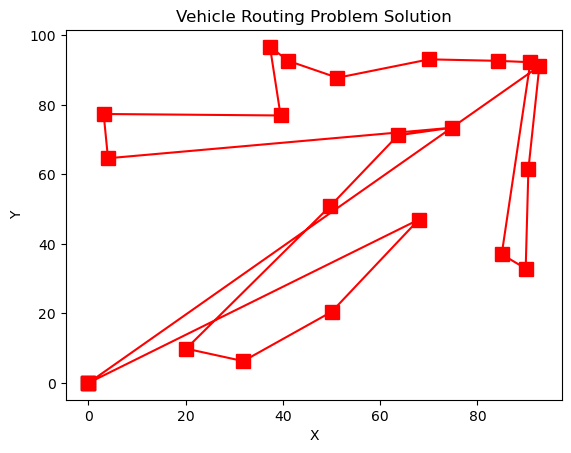

Generation 39: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


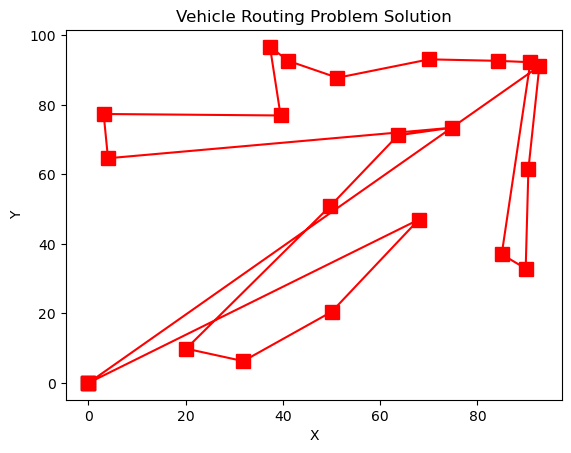

Generation 40: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


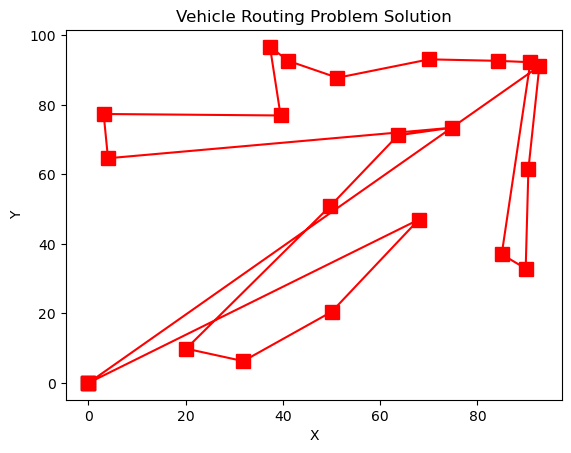

Generation 41: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


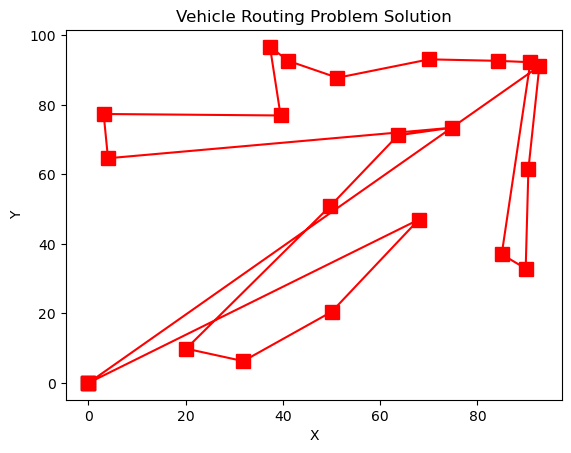

Generation 42: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


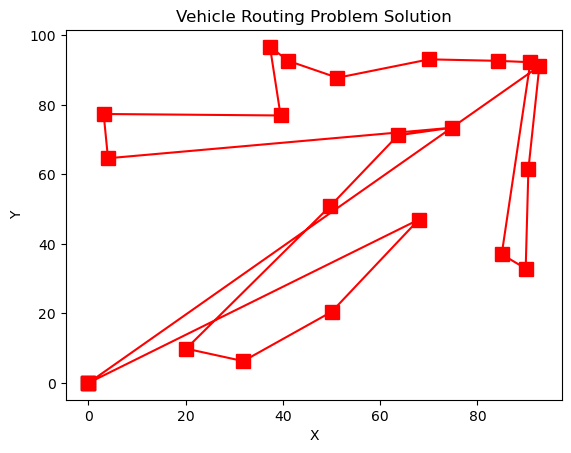

Generation 43: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


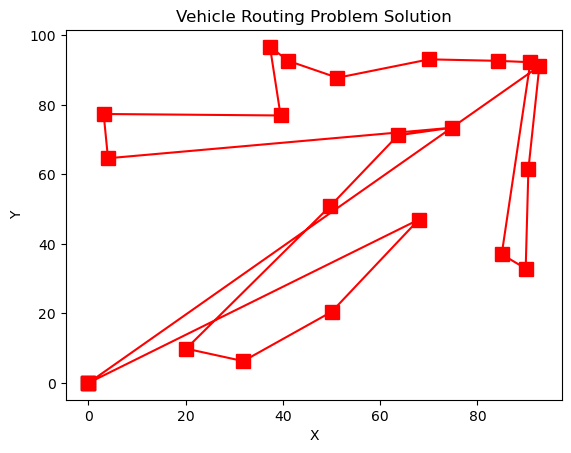

Generation 44: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


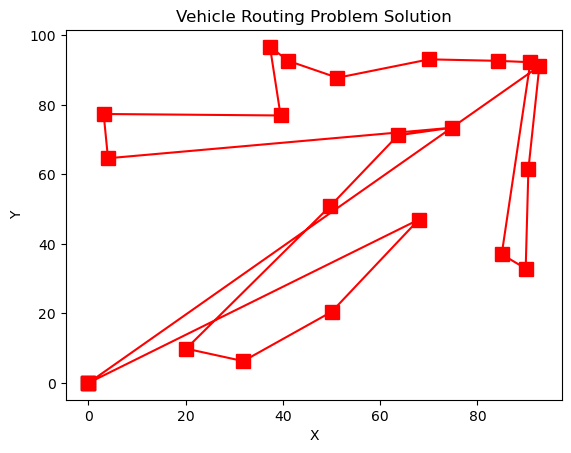

Generation 45: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


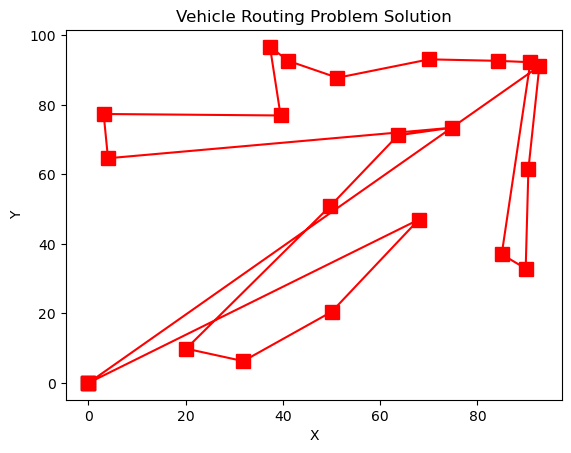

Generation 46: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


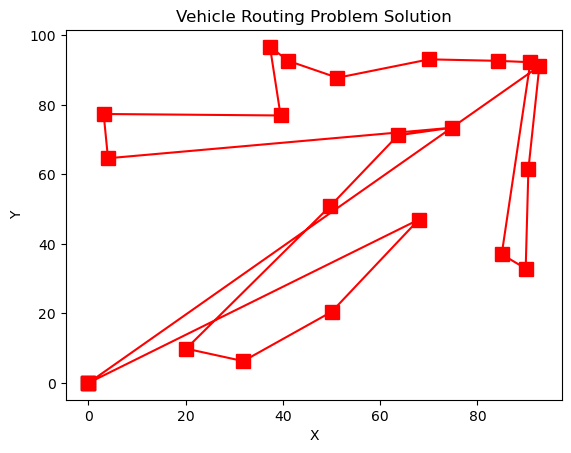

Generation 47: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


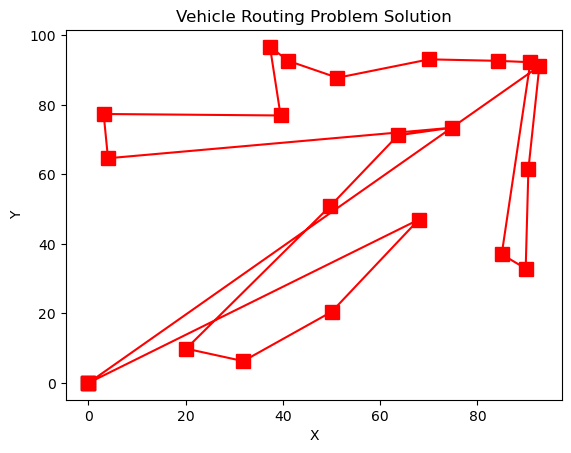

Generation 48: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


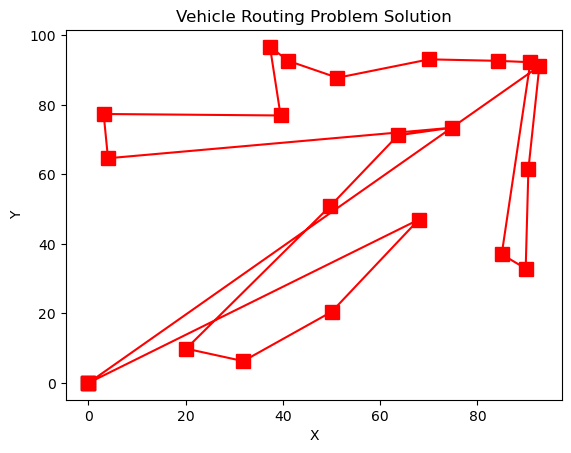

Generation 49: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


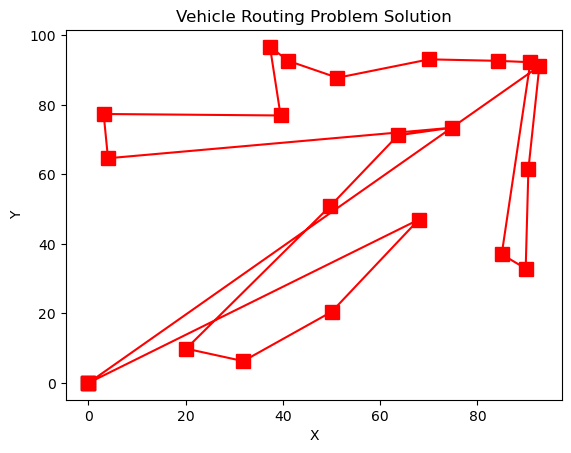

Generation 50: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


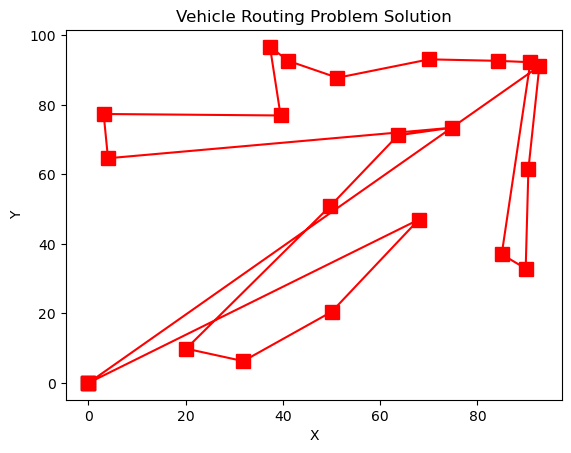

Generation 51: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


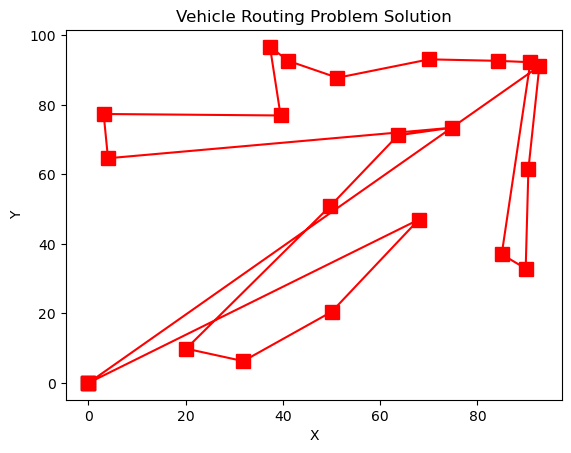

Generation 52: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


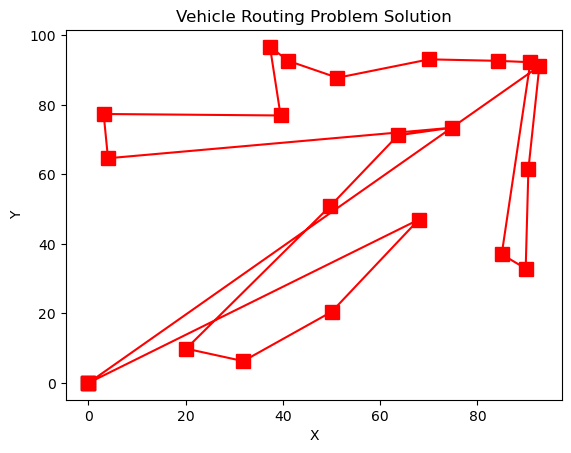

Generation 53: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


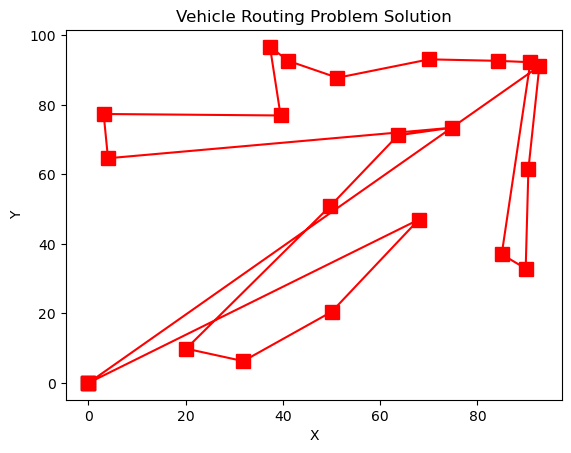

Generation 54: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


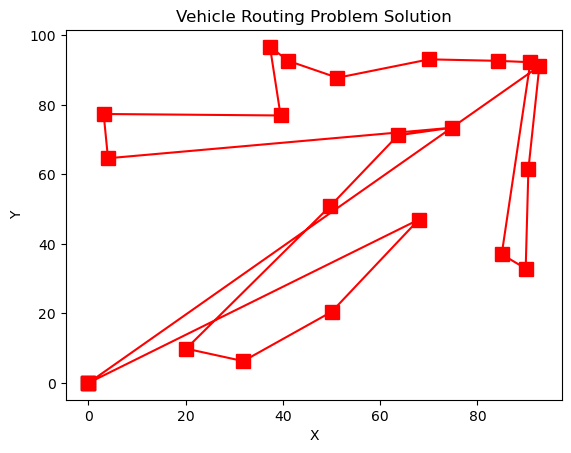

Generation 55: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


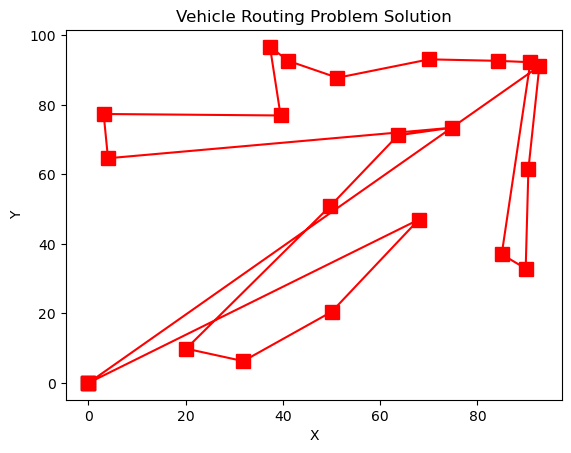

Generation 56: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


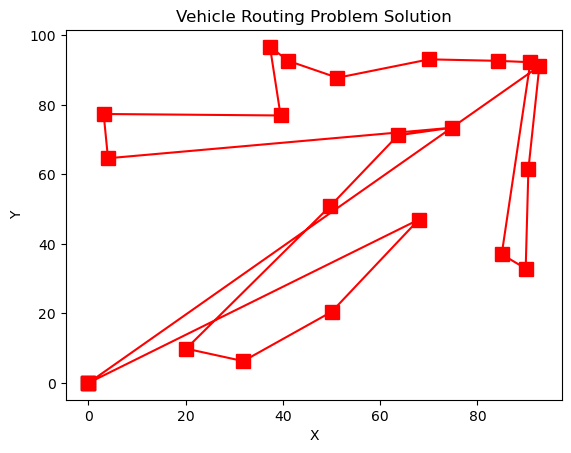

Generation 57: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


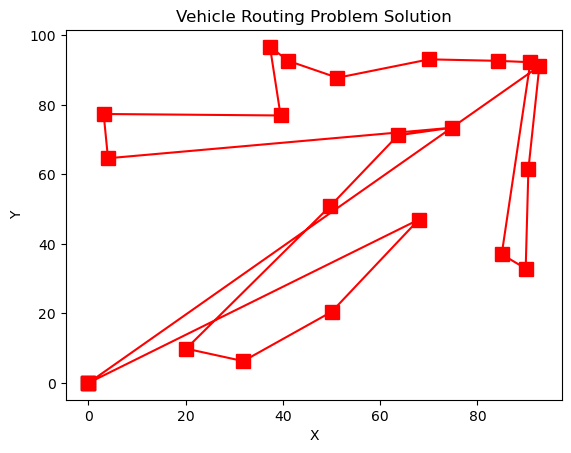

Generation 58: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


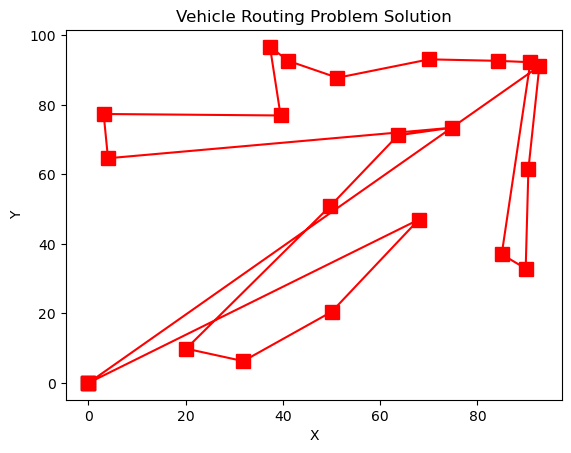

Generation 59: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


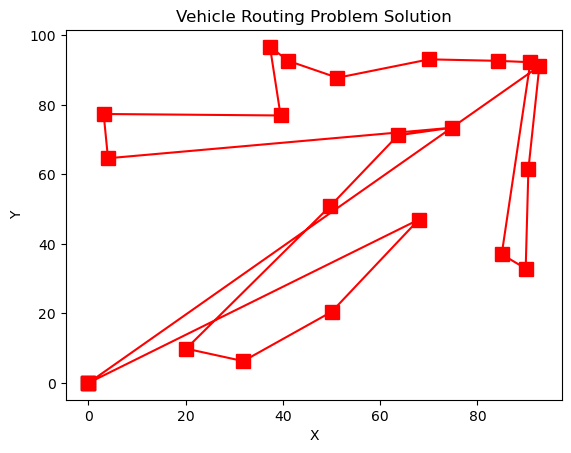

Generation 60: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


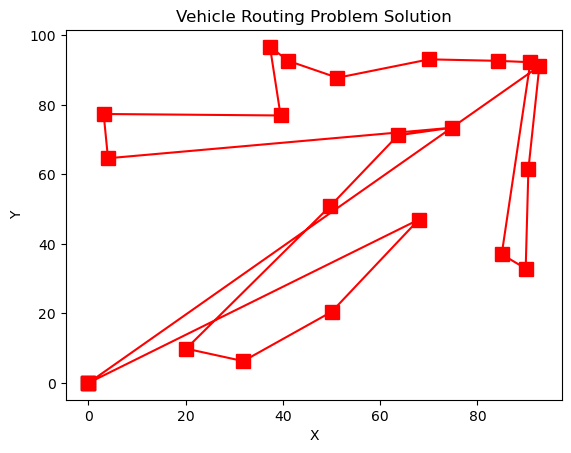

Generation 61: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


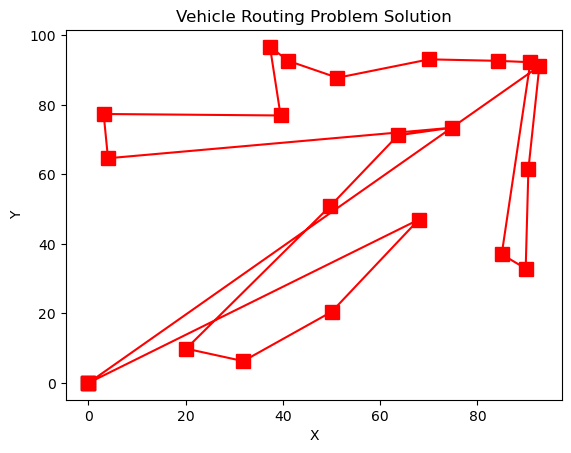

Generation 62: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


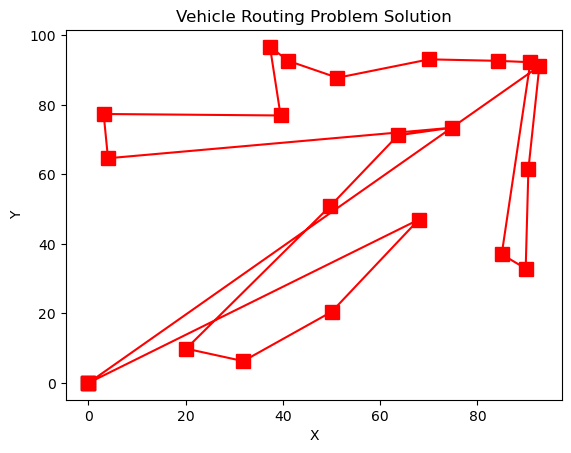

Generation 63: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


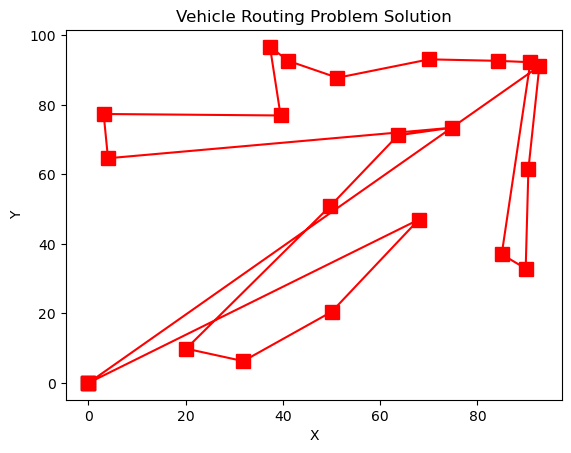

Generation 64: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


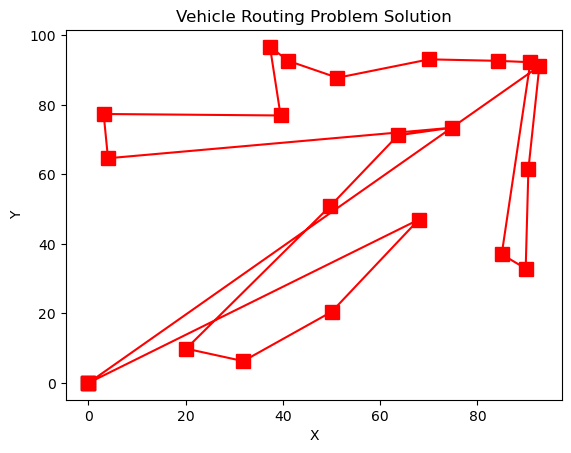

Generation 65: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


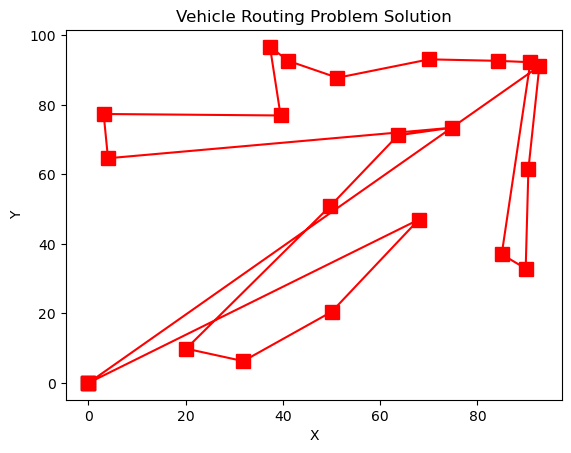

Generation 66: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


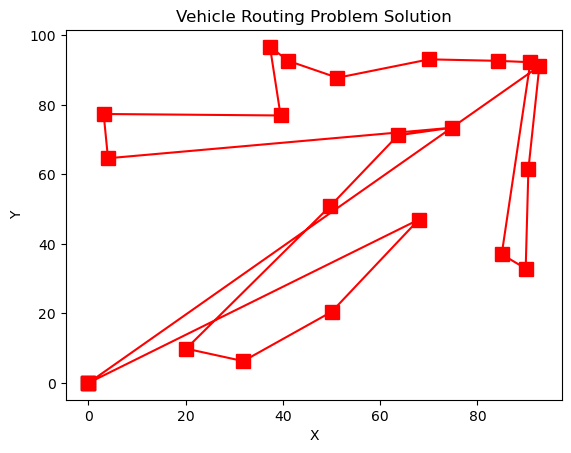

Generation 67: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 5, 11, 18, 9, 12, 15, 13, 17, 1, 19], fitness=471.52207831101975


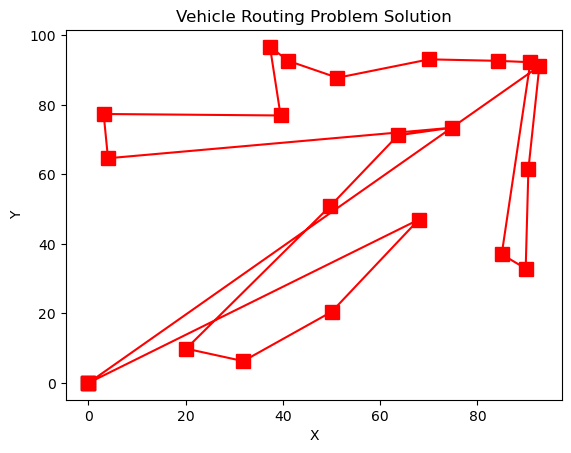

Generation 68: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 18, 11, 5, 9, 12, 15, 13, 17, 1, 19], fitness=462.0340200297402


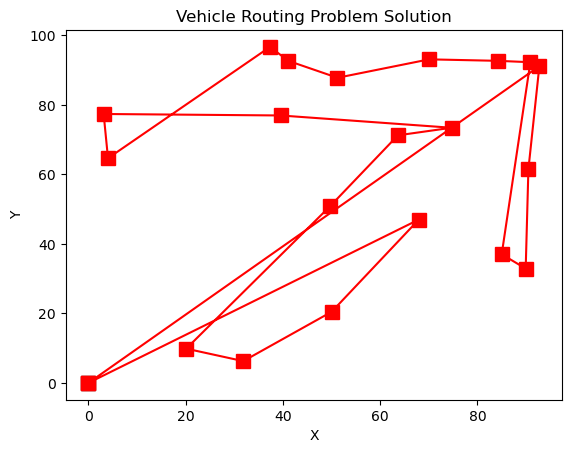

Generation 69: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 18, 11, 5, 9, 12, 15, 13, 17, 1, 19], fitness=462.0340200297402


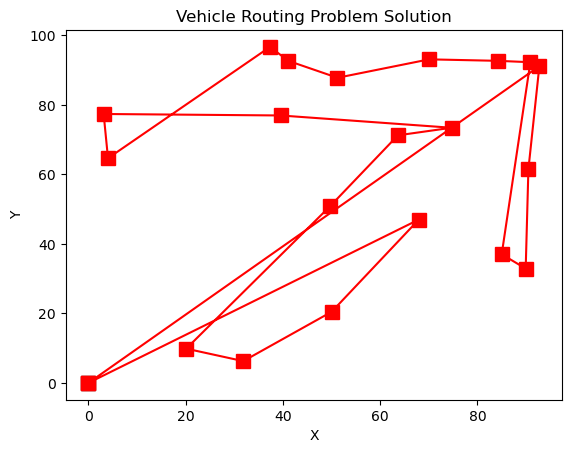

Generation 70: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 18, 11, 5, 9, 12, 15, 13, 17, 1, 19], fitness=462.0340200297402


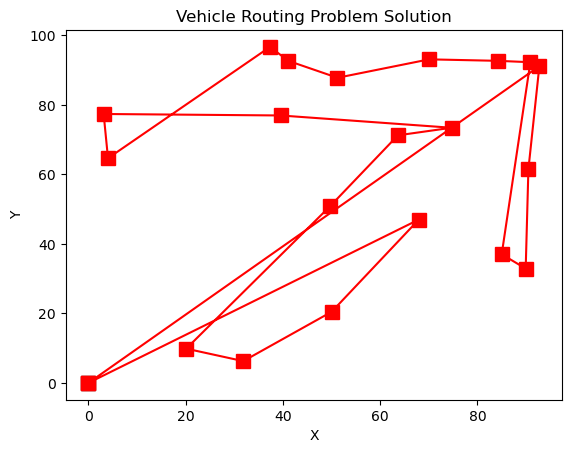

Generation 71: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 18, 11, 5, 9, 12, 15, 13, 17, 1, 19], fitness=462.0340200297402


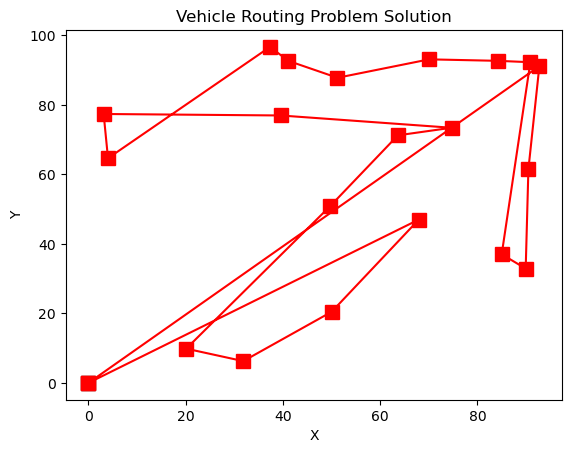

Generation 72: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


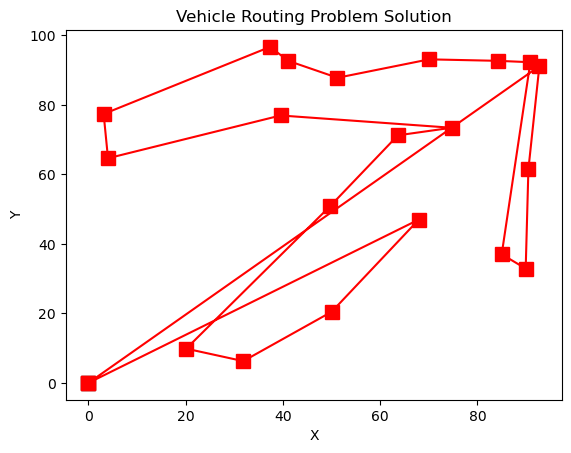

Generation 73: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


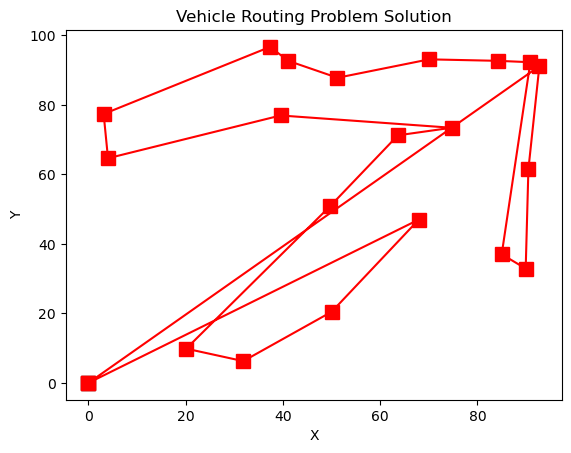

Generation 74: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


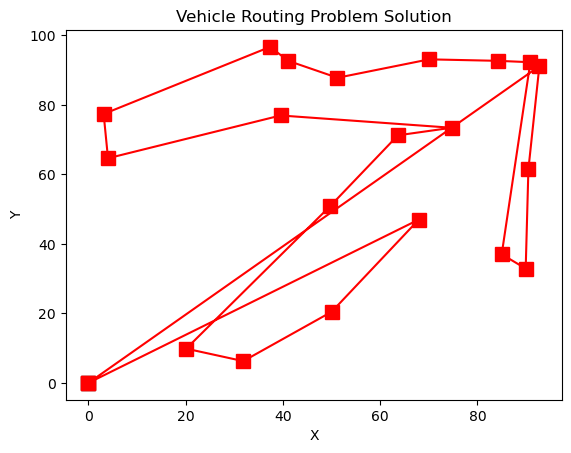

Generation 75: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


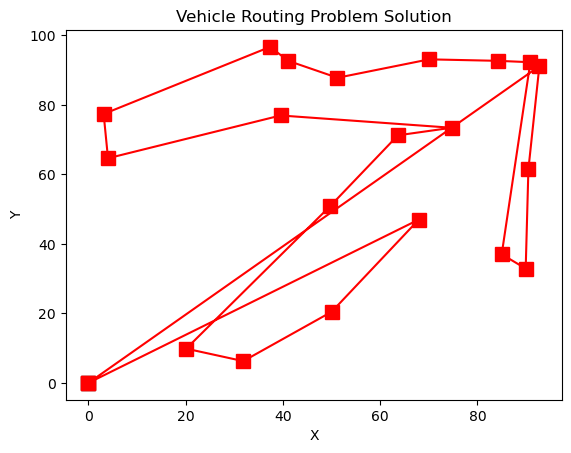

Generation 76: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


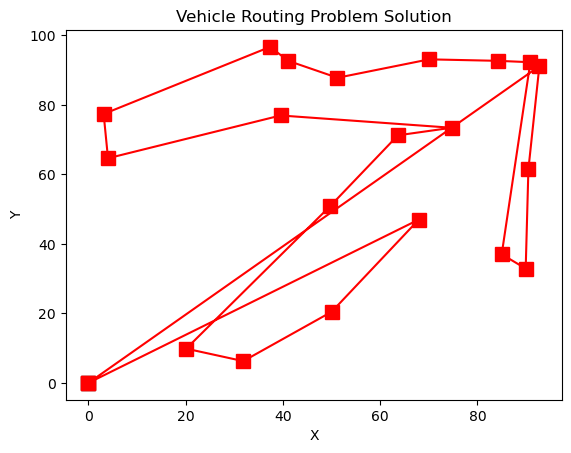

Generation 77: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


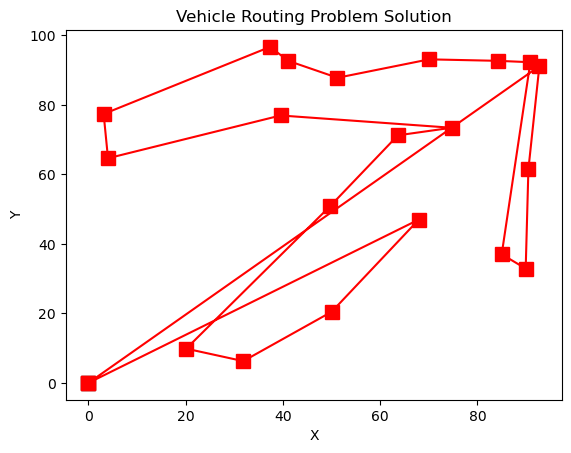

Generation 78: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


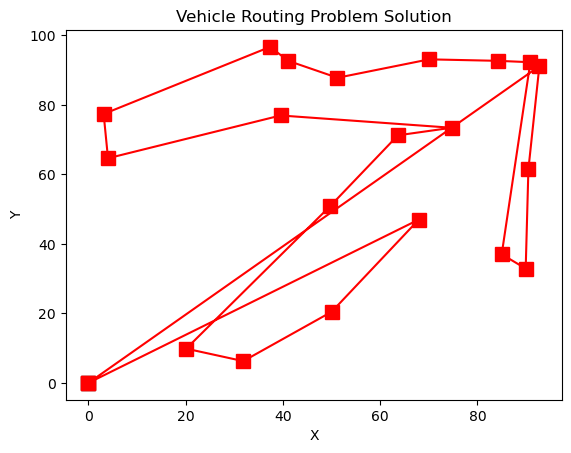

Generation 79: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


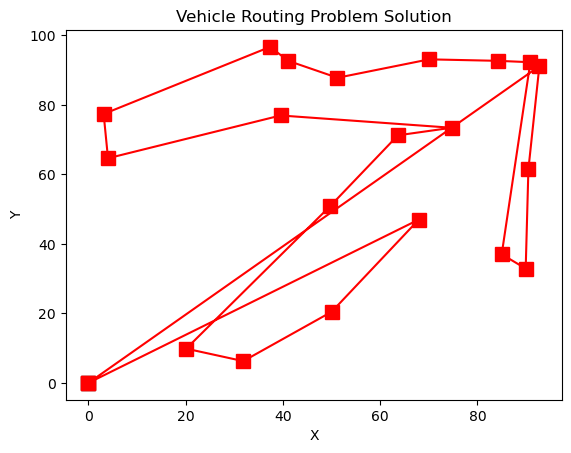

Generation 80: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


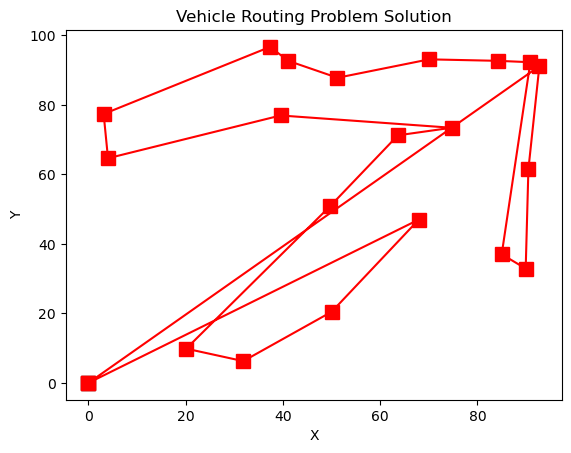

Generation 81: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


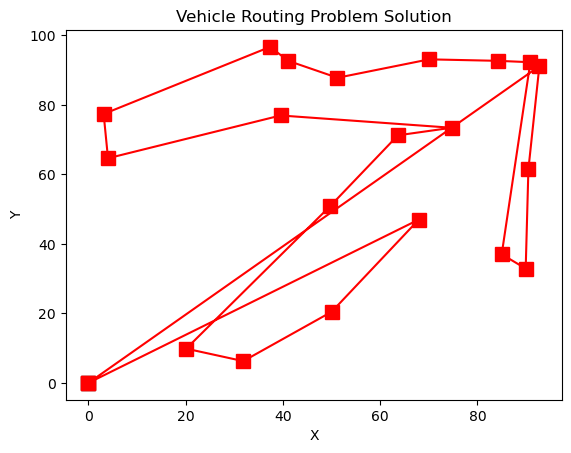

Generation 82: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


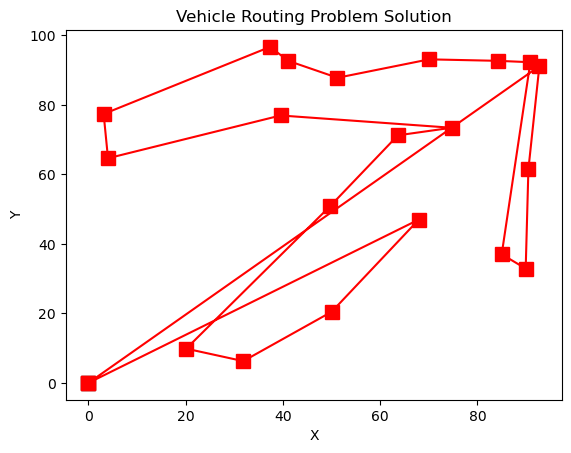

Generation 83: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


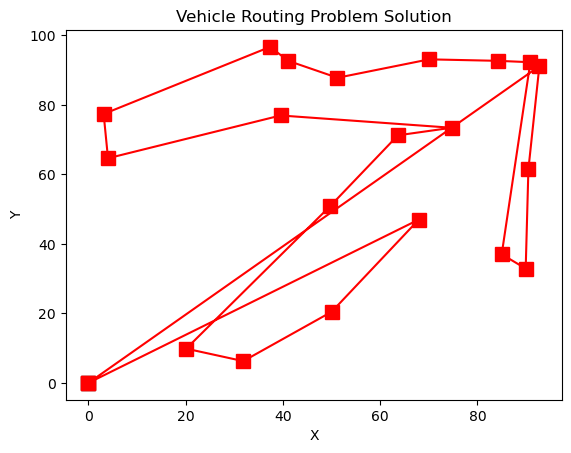

Generation 84: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


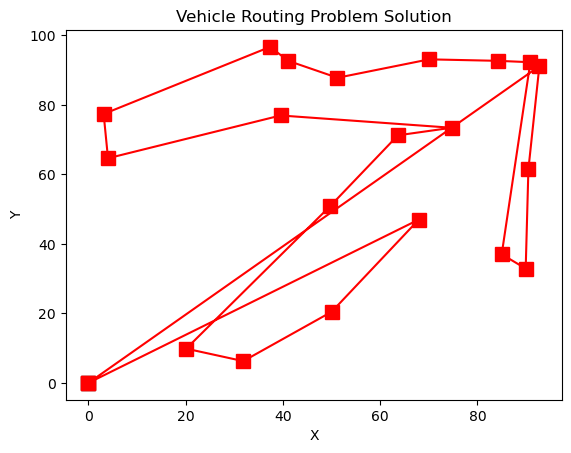

Generation 85: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


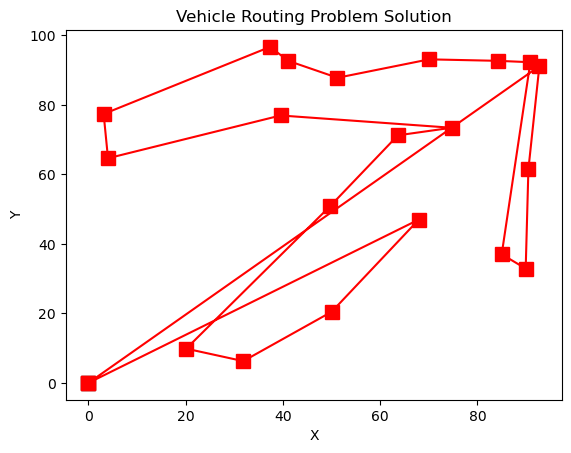

Generation 86: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


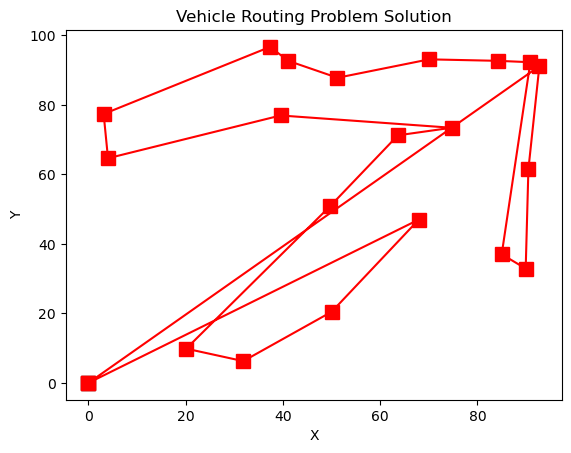

Generation 87: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


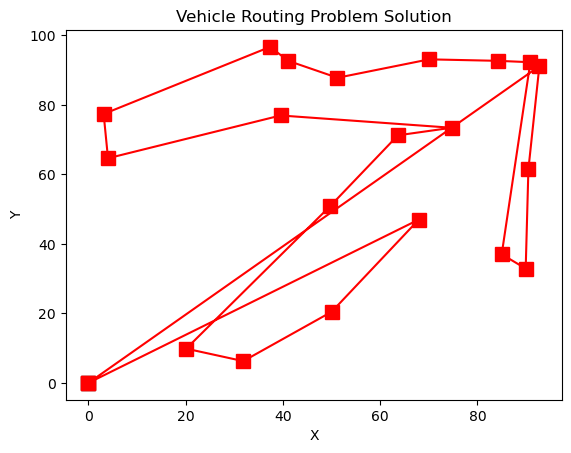

Generation 88: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


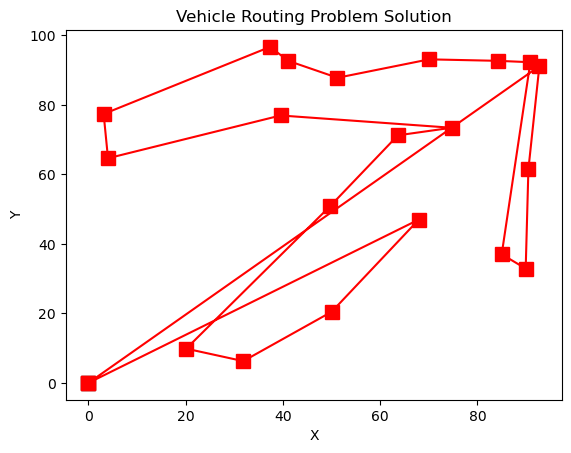

Generation 89: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


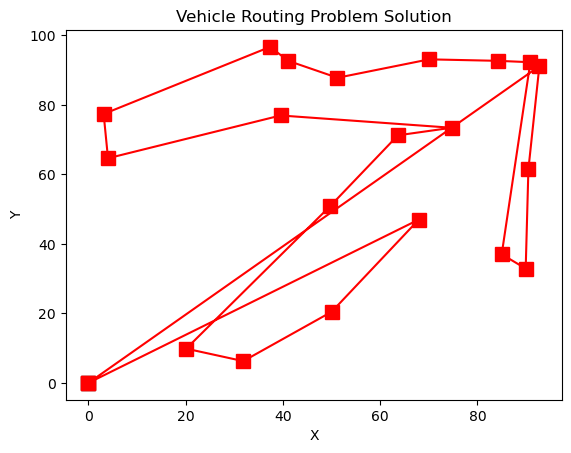

Generation 90: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


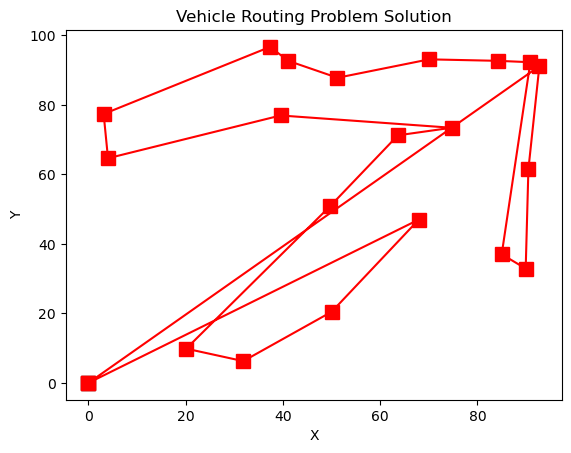

Generation 91: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


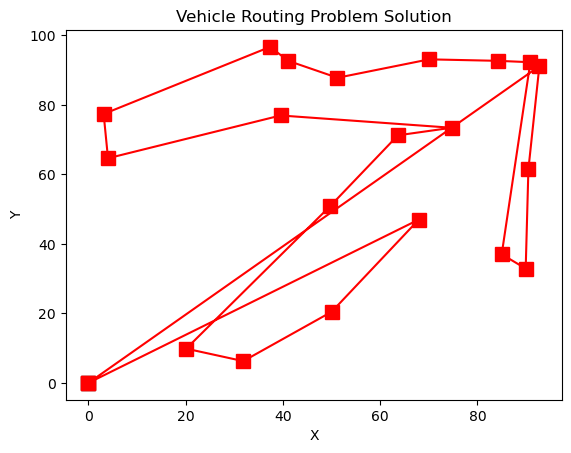

Generation 92: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


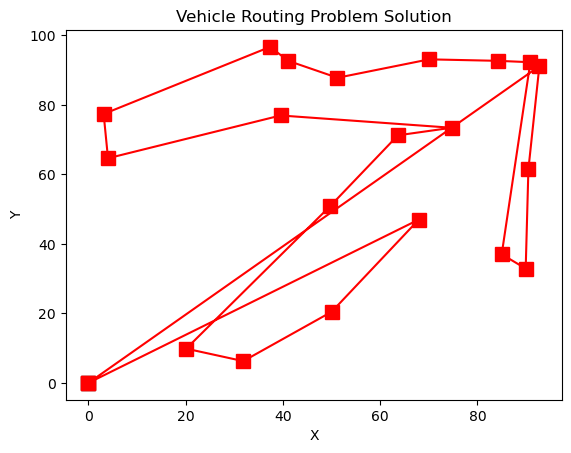

Generation 93: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


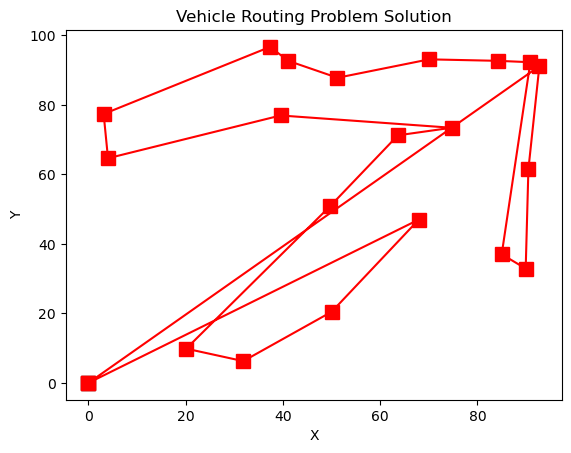

Generation 94: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


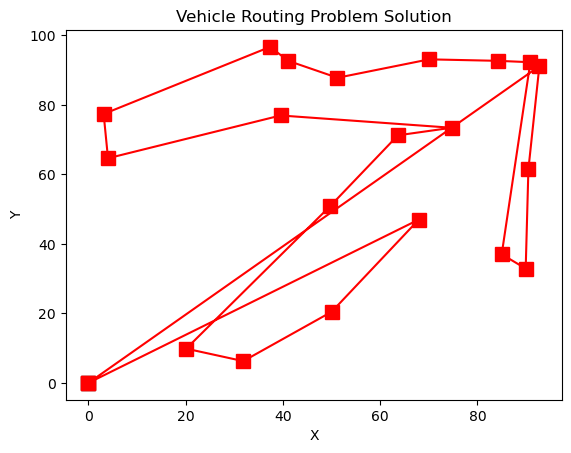

Generation 95: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


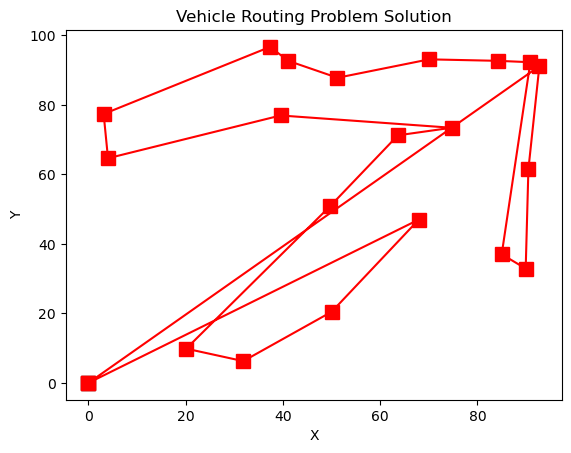

Generation 96: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


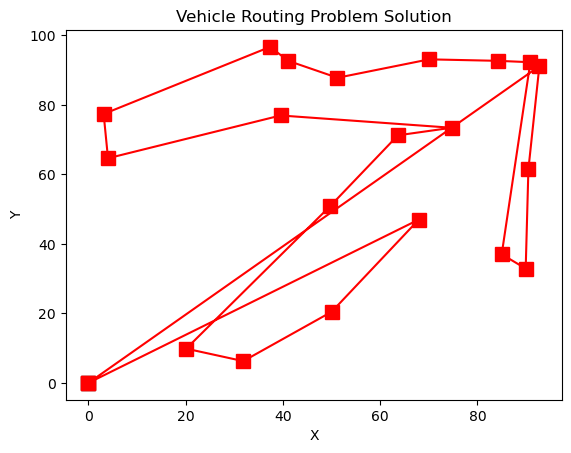

Generation 97: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


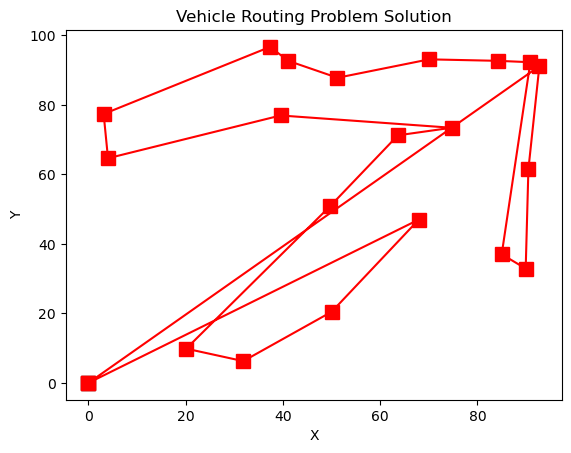

Generation 98: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


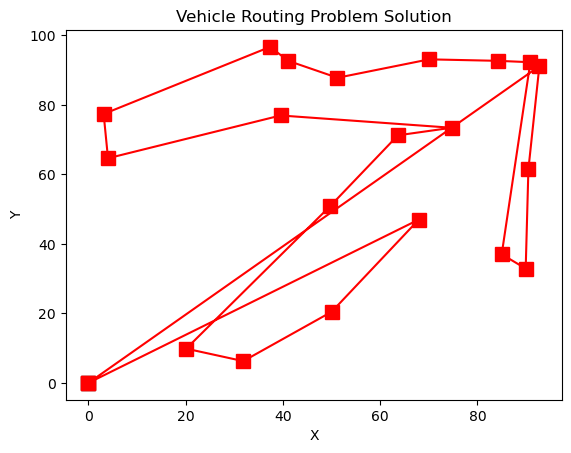

Generation 99: [0, 2, 3, 4, 14, 16, 6, 7, 10, 8, 11, 18, 5, 9, 12, 15, 13, 17, 1, 19], fitness=456.27336718880355


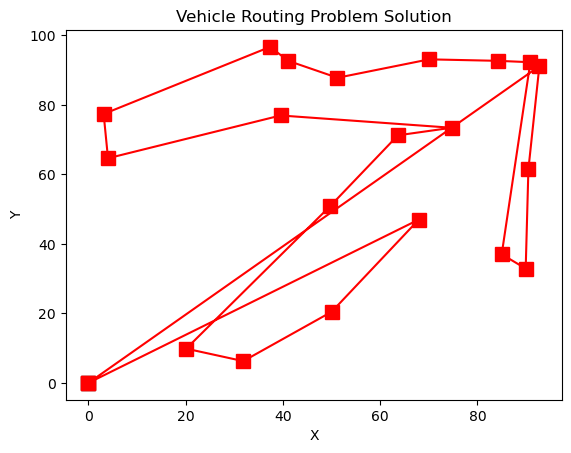

In [12]:
# Run the genetic algorithm
for generation in range(num_generations):
    fitnesses = [fitness(individual) for individual in population]

    parents = [population[i] for i in sorted(range(len(fitnesses)), key=lambda i: fitnesses[i])[:population_size // 2]]

    best_solution = min(population, key=fitness)
    print(f"Generation {generation}: {best_solution}, fitness={fitness(best_solution)}")

    coordinates = [depot] + [customer_positions[i] for i in best_solution] + [depot]

    # next generation
    offspring = []
    for i in range(population_size // 2):
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)
        crossover_point = random.randint(1, len(parent1) - 2)
        child1 = parent1[:crossover_point] + [c for c in parent2 if c not in parent1[:crossover_point]]
        child2 = parent2[:crossover_point] + [c for c in parent1 if c not in parent2[:crossover_point]]
        if random.random() < mutation_rate:
            mutation_point1 = random.randint(1, len(child1) - 2)
            mutation_point2 = random.randint(1, len(child2) - 2)
            child1[mutation_point1], child1[mutation_point2] = child1[mutation_point2], child1[mutation_point1]
            child2[mutation_point1], child2[mutation_point2] = child2[mutation_point2], child2[mutation_point1]
        offspring += [child1, child2]

    population = parents + offspring

    plt.scatter(*zip(*customer_positions))
    plt.scatter(*depot, marker='s', s=100, color='black')

    plt.plot(*zip(*coordinates), linestyle='-', marker='s', markersize=10, color='red')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Vehicle Routing Problem Solution')

    plt.show()


In [23]:
print(parents)

[[0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], [0, 0, 3, 14, 1, 2, 19, 

In [24]:
# Select the fittest individual as the solution to the problem
best_individual = min(population, key=lambda individual: fitness(individual))
solution = best_individual[1:-1] # remove the depot indices from the solution

best_solution = min(population, key=fitness)
print(f"\nbest Solution found at Generation {generation}: {best_solution}, fitness={fitness(best_solution)}")


coordinates = [depot] + [customer_positions[i] for i in solution] + [depot]
print("Coordinates:", coordinates)




best Solution found at Generation 99: [0, 0, 3, 14, 1, 2, 19, 7, 16, 10, 4, 12, 5, 15, 9, 13, 11, 17, 6, 8, 18], fitness=484.2578690586149
Coordinates: [(0, 0), (56.52078481354527, 47.80815733635032), (39.54077810969194, 32.614906371819295), (44.211644301477925, 19.69440243134849), (44.77144942184667, 15.988411051842144), (58.78078097549502, 28.657256578527058), (75.07616004048523, 71.69206299678244), (68.99846484963176, 77.40618221312548), (67.86273267717459, 94.59778244532536), (77.15861463761358, 89.27457340046901), (54.48992608148401, 65.17276533292394), (56.53114402041225, 61.20570990064947), (27.561648646077174, 53.49581808265504), (7.320164170907672, 44.87023642547342), (14.54370468223074, 2.1659540257414567), (15.652437218812443, 1.7398797561022472), (96.25763578050963, 72.60862883736152), (94.45453172451006, 36.08518005906176), (71.52948981762846, 35.96547982216352), (79.53812294511057, 7.571256718923436), (0, 0)]


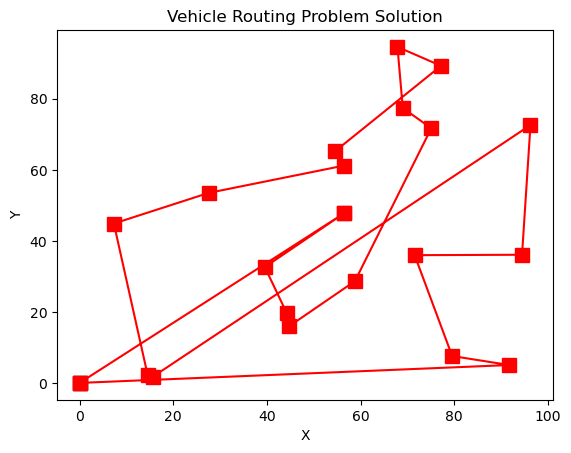

In [25]:

coordinates = [depot] + [customer_positions[i] for i in best_solution] + [depot]

plt.scatter(*zip(*customer_positions))
plt.scatter(*depot, marker='s', s=100, color='black')

plt.plot(*zip(*coordinates), linestyle='-', marker='s', markersize=10, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vehicle Routing Problem Solution')

# Show the plot
plt.show()